## Lyapunov Exponent and Out-of-Time-Ordered Correlator’s Growth Rate

In [3]:
from numpy import *
import math
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy.signal import medfilt
import random as rand

from OTOCfunc import *
from LYAPfunc import *

In [2]:
N=2**14
T=2**-7
trials_OTOC=1
trials=1
K=logspace(-2,2,50)
Nkicks=30
Kick=arange(1,Nkicks+1,1)

mean_C=zeros([Nkicks,len(K),trials])
for kk in range(trials):
    mean_C[:,:,kk]=mean_otoc(N,T,K,Nkicks,trials_OTOC,True)


KeyboardInterrupt: 

In [4]:
# to save OTOC to file
save=False
if save==True:
    save(mean_C,'OTOCperLyapQ_mediati10-10.txt')

In [4]:
# to load data
load=True
if load==True:
    N=2**14
    T=2**-7
    trials=4
    K=logspace(-2,2,50)
    Nkicks=30
    Kick=arange(1,Nkicks+1,1)

    data = loadtxt("OTOCperLyapQ_mediati4-4.txt", comments="#", delimiter=" ", unpack=False)
    mean_C=reshape(data.astype(float),(Nkicks,len(K),4))

### Quantum CGR

In [5]:
lyap_Q_T=zeros([len(K),trials])
for jj in range(trials):
    lyap_Q_T[:,jj]=lyapQ_comp(Kick, K,mean_C[:,:,jj])
lyap_Q=mean(lyap_Q_T,1)

C:\Users\cleli\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(30, 50, 4)
0.04498432668969444 0.09956770338411869 (50,)


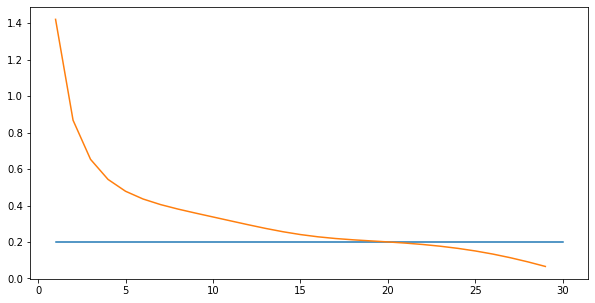

In [21]:
print(shape(mean_C))
### sistemare punto 7
print(K[8],lyap_Q[7],shape(lyap_Q))
plt.figure(figsize=(10,5))
lyap_num=lyapunov_num(mean_C[:,7,0],Kick)
plt.plot(Kick,ones(len(Kick))*lyap_Q[7]*2)
plt.plot(Kick[:-1],lyap_num)

### Classical LE numerically computed

In [7]:
P=100
Nkicks=50 
trials=5#100
dxi=10**(-10)
dpi=10**(-10)
lyap_t=zeros([len(K),trials])
lyapCL=zeros(len(K))
for kk in range(0,len(K)):
    for ii in range(trials):
        x_i=rand.uniform(0,2*pi)
        p_i=rand.uniform(0,2*pi)
        nd = evoluz(P, x_i, p_i, dxi, dpi, Nkicks, K[kk])
        lyap_t[kk,ii] = lyapFunc(P,Nkicks,nd)
    lyapCL[kk]=sum(lyap_t[kk,:])/trials


### Classical CGR numerically computed

In [8]:
Nkicks=50
trials=5000
dxi=10**(-10)
dpi=10**(-10)

CGR_c=zeros(len(K))
for kk in range(0,len(K)):
    dp2=zeros([Nkicks,trials])
    for ii in range(trials):
        x_i=rand.uniform(0,2*pi)
        p_i=rand.uniform(0,2*pi)
        dp2[:,ii] = map_kr_CGR(x_i, p_i, dxi, dpi, Nkicks, K[kk])
    dp2mean=mean(dp2,1)
    
    dp2meanShift=insert(dp2mean, 0, 0)
    dp2meanShift=delete(dp2meanShift, -1)

    ratio= log(dp2mean[2:]/dp2meanShift[2:])
    
    CGR_c[kk]=(1/(2*(Nkicks-1)))*sum(ratio)


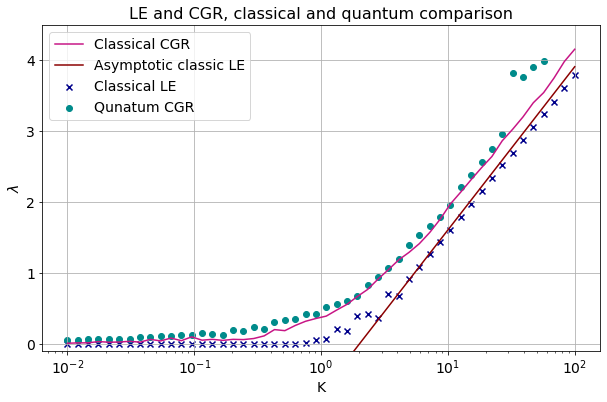

In [25]:
plt.figure(figsize=(10,6))
plt.xscale('log')

# Classical LE
plt.scatter(K,lyapCL,marker='x',label='Classical LE', color='darkblue')

# Classical CGR
CGR_c_f=zeros(len(K))
CGR_c_f = savgol_filter(CGR_c,3,1)
plt.plot(K, CGR_c, label='Classical CGR',color='mediumvioletred')

# classical LE analytical behaviour for large K
plt.plot(K,log(K/2), label='Asymptotic classic LE', color='darkred')

# Quantum CGR
lyap_Q_f=zeros(len(K))
lyap_Q_f = savgol_filter(lyap_Q,3,1)
plt.scatter(K[:-3],lyap_Q[:-3], label='Qunatum CGR', color='darkcyan')
plt.legend(fontsize=14)

plt.ylim([-0.1,4.5])
plt.xlabel('K', size=14)
plt.ylabel('$\lambda$', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('LE and CGR, classical and quantum comparison',size=16)
plt.grid()
plt.savefig('CGRandLE.png', dpi=100)